### get data ready

In [1]:
import os
import pandas as pd
import re
import numpy as np
import os
import time
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
from keras.models import load_model
from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import nltk

import keras, os, pickle, re, sklearn, string, tensorflow
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.layers import Embedding
from keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/Users/ezra/anaconda3/envs/tfdeeplearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/ezra/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
all_img = os.listdir('../NLMCXR_png/')
all_img.remove('CXR1_1_IM-0001-3001.png')
all_img.remove('CXR1_1_IM-0001-4001.png')
all_img.remove('.DS_Store')
all_img.remove('Thumbs.db')
df = pd.read_csv('../ids_texts_labels.csv') 

ids = []
for i in all_img:
    try:
        ids.append('CXR'+re.findall(r'CXR(.*)_',i)[0])
    except:
        pass
    


In [3]:
k = 0
throw = []
labels = []
for i in ids:
    
    try:
    
        labels.append(int(df[df['ID'] == i].Labels))
        
    except:
        
        throw.append(k)
        
    k += 1

In [4]:
df

,Unnamed: 0,ID,Text,Labels
0,0,CXR162,XXXX. Normal chest Heart size normal. Lungs ar...,0
1,1,CXR1390,"Slipped , XXXX back on right side No evidence ...",1
2,2,CXR604,Bone marrow transplant evaluation. AML. 1. No ...,1
3,3,CXR2699,XXXX year old chest pain and XXXX. No acute ca...,0
4,4,CXR2841,XXXX year old mid to lower back pain since XXX...,0
5,5,CXR3587,XXXX for one XXXX. Negative chest . The lungs ...,0
6,6,CXR2855,XXXX-year-old XXXX with chest pain. No acute c...,0
7,7,CXR3593,hemoptysis. Normal chest Heart size normal. Lu...,0
8,8,CXR88,"Worsening dyspnea, history of coronary artery ...",1
9,9,CXR610,XXXX-year-old with elevated INR and nosebleeds...,1


In [5]:
ids_front = []
for i in all_img:
    try:
        ids_front.append('CXR'+re.findall(r'CXR(.*)_',i)[0])
    except:
        pass

In [6]:
k = 0
throw = []
labels_front = []
for i in ids_front:
    
    try:
    
        labels_front.append(int(df[df['ID'] == i].Labels))
        
    except:
        
        throw.append(k)
        
    k += 1

In [7]:
PATH = '/Users/ezra/research/new_data/NLMCXR_png/'

img_data_list=[]


for img in all_img:
    img_path = PATH+img
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_data_list.append(x)

img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)


(7468, 1, 224, 224, 3)
(1, 7468, 224, 224, 3)
(7468, 224, 224, 3)


In [8]:
text_data = []
text_labels = []
textdata = pd.read_csv('../ids_texts_labels.csv')

for i in ids_front: 
    text_data.append(str (textdata[textdata['ID']== i].Text.item()))
    text_labels.append(textdata[textdata['ID']== i].Labels.item())

In [9]:
text_labels == labels_front

True

In [10]:
multi_data = []

for i in range(len(text_data)):
    temp = [1,1,1]
    
    temp[2] = text_data[i]
    temp[1] = img_data[i]
    temp[0] = ids_front[i]
    multi_data.append(temp)
    
multi_label = labels_front

In [11]:
#Shuffle text dataset
x,y = shuffle(multi_data,multi_label, random_state=31)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31)

### For Text Model

In [12]:
data = pd.read_csv('../ids_texts_labels.csv')

In [13]:
# EMBEDDING
MAX_NUM_WORDS  = 15000
EMBEDDING_DIM  = 300
MAX_SEQ_LENGTH = 140
USE_GLOVE      = True

# MODEL
FILTER_SIZES   = [3,4,5]
FEATURE_MAPS   = [10,10,10]
DROPOUT_RATE   = 0.5

# LEARNING
BATCH_SIZE     = 200
NB_EPOCHS      = 10
RUNS           = 1
VAL_SIZE       = 0.2

In [14]:
def clean_doc(doc):
    """
    Cleaning a document by several methods:
        - Lowercase
        - Removing whitespaces
        - Removing numbers
        - Removing stopwords
        - Removing punctuations
        - Removing short words
    """
    stop_words = set(stopwords.words('english'))
    
    # Lowercase
    doc = doc.lower()
    # Remove numbers
    doc = re.sub(r"[0-9]+", "", doc)
    # Split in tokens
    tokens = doc.split()
    # Remove Stopwords
    tokens = [w for w in tokens if not w in stop_words]
    # Remove punctuation
    tokens = [w.translate(str.maketrans('', '', string.punctuation)) for w in tokens]
    # Tokens with less then two characters will be ignored
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

In [15]:
train_docs = [clean_doc(i[2]) for i in X_train]
test_docs = [clean_doc(i[2]) for i in X_test]

In [16]:
print('Training samples: %i' % len(train_docs))

Training samples: 5974


In [1]:
def max_length(lines):
    """
    Calculate the maximum document length
    """
    return max([len(s.split()) for s in lines])

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
test_tok = Tokenizer(num_words=MAX_NUM_WORDS)
test_tok.fit_on_texts(test_docs)
tokenizer.fit_on_texts(train_docs)
print(tokenizer.word_index.items())
sequences = tokenizer.texts_to_sequences(train_docs)
seq_test = test_tok.texts_to_sequences(test_docs)

length = max_length(train_docs)
word_index = tokenizer.word_index

result = [len(x.split()) for x in train_docs]
print('Text informations:')
print('max length: %i / min length: %i / mean length: %i / limit length: %i' % (np.max(result),
                                                                                np.min(result),
                                                                                np.mean(result),
                                                                                MAX_SEQ_LENGTH))
print('vacobulary size: %i / limit: %i' % (len(word_index), MAX_NUM_WORDS))

# Padding all sequences to same length of `MAX_SEQ_LENGTH`
data   = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='post')
val = pad_sequences(seq_test, maxlen=MAX_SEQ_LENGTH, padding='post')

NameError: name 'Tokenizer' is not defined

In [18]:
all_docs = train_docs + test_docs
tok_corpus = [nltk.word_tokenize(sent) for sent in all_docs]
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
path = get_tmpfile("word2vec.model")

model = Word2Vec(tok_corpus, min_count = 1, size = 300)

In [19]:
def create_glove_embeddings():
    embeddings_index = {}
    f = open('/Users/ezra/research/new_data/new_data_embed300.txt')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    print('Found %s word vectors in GloVe embedding' % len(embeddings_index))

    embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))

    for word, i in tokenizer.word_index.items():
        if i >= MAX_NUM_WORDS:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM,
                     input_length=MAX_SEQ_LENGTH,
                     weights=[embedding_matrix],
                     trainable=True
                    )


import cnn_model

histories = []

for i in range(RUNS):
    print('Running iteration %i/%i' % (i+1, RUNS))
        
    emb_layer = None
    if USE_GLOVE:
        emb_layer = create_glove_embeddings()
    
    model = cnn_model.build_cnn(
        embedding_layer=emb_layer,
        num_words=MAX_NUM_WORDS,
        embedding_dim=EMBEDDING_DIM,
        filter_sizes=FILTER_SIZES,
        feature_maps=FEATURE_MAPS,
        max_seq_length=MAX_SEQ_LENGTH,
        dropout_rate=DROPOUT_RATE
    )
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adadelta(clipvalue=3),
        metrics=['accuracy']
    )
    
    history = model.fit(
        data, y_train,
        epochs=NB_EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=(val, y_test),
        callbacks=[ModelCheckpoint('model-%i.h5'%(i+1), monitor='val_loss',
                                   verbose=1, save_best_only=True, mode='min'),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=0.01)
                  ]
    )
    print()
    histories.append(history.history)

Running iteration 1/1
Pretrained embeddings is loading...
Found 2796 word vectors in GloVe embedding
Creating CNN 0.0.1
#############################################
Embedding:    using pre-trained embedding
Vocabulary size: 15000
Embedding dim: 300
Filter sizes: [3, 4, 5]
Feature maps: [10, 10, 10]
Max sequence: 140
#############################################
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Train on 5974 samples, validate on 1494 samples
Epoch 1/10
5974/5974 [==============================] - 18s 3ms/step - loss: 1.5315 - acc: 0.7559 - val_loss: 1.0131 - val_acc: 0.7985

Epoch 00001: val_loss improved from inf to 1.01309, saving model to model-1.h5
Epoch 2/10
5974/5974 [==============================] - 17s 3ms/step - loss: 0.7165 - acc: 0.8500 - val_loss: 0.6404 - val_acc: 0.8119

Epoch 00002: val_loss improved from 1.01309 to 0.64038, saving model to model-1.h5
Epoch 3/10
5974/5974 [==============================] - 16s 3ms/step -

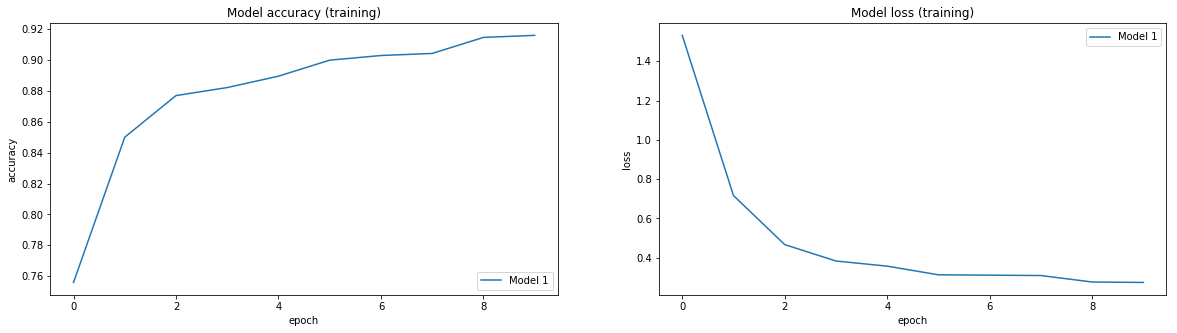

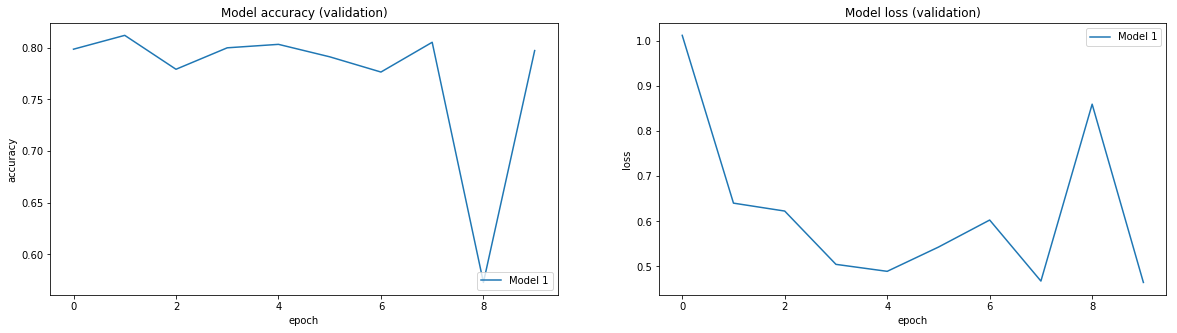

In [20]:
def plot_acc_loss(title, histories, key_acc, key_loss):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # Accuracy
    ax1.set_title('Model accuracy (%s)' % title)
    names = []
    for i, model in enumerate(histories):
        ax1.plot(model[key_acc])
        ax1.set_xlabel('epoch')
        names.append('Model %i' % (i+1))
        ax1.set_ylabel('accuracy')
    ax1.legend(names, loc='lower right')
    # Loss
    ax2.set_title('Model loss (%s)' % title)
    for model in histories:
        ax2.plot(model[key_loss])
        ax2.set_xlabel('epoch')
        ax2.set_ylabel('loss')
    ax2.legend(names, loc='upper right')
    fig.set_size_inches(20, 5)
    plt.show()
    
plot_acc_loss('training', histories, 'acc', 'loss')
plot_acc_loss('validation', histories, 'val_acc', 'val_loss')

In [21]:
i = 0
for j in y_test:
    if j == 1:
        i += 1
        
        
i / len(y_test) 

0.643908969210174

In [22]:
# around 79.72 % performance 

## Images

In [23]:
# Preprocessing the 

X_train
X_test



In [24]:
import cv2

In [25]:
train_imgs = np.array([cv2.resize(i[1], (224,224)) for i in X_train])
test_imgs = np.array([cv2.resize(i[1], (224,224)) for i in X_test])


X_train = np.array(train_imgs,np.float32) / 225
X_test = np.array(test_imgs,np.float32) / 225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


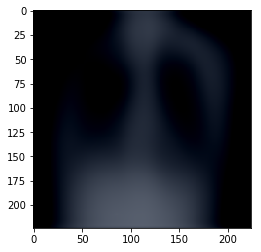

In [26]:
mean_img = np.mean(X_train, axis = 0)
plt.imshow(mean_img)

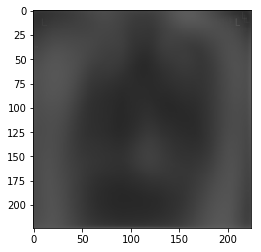

In [27]:
std_img = np.std(X_train, axis=0)
plt.imshow(std_img)

In [28]:
#Normalization

x_train_norm = (X_train - mean_img) / std_img
x_train_norm.shape

(5974, 224, 224, 3)

In [29]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import keras
from keras.models import load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np


In [36]:
image_input = Input(shape=(224, 224, 3))

base_model = keras.applications.densenet.DenseNet121(include_top=True, weights='./brucechou1983_CheXNet_Keras_0.3.0_weights.h5', input_tensor=image_input, input_shape=None, pooling=None, classes=14)


In [41]:

last_layer = base_model.get_layer('avg_pool').output

x = keras.layers.BatchNormalization()(last_layer)
x = Dense(512, activation='relu')(x)
x = Dropout(.5)(x)
x = keras.layers.BatchNormalization()(x)
out = Dense(1, activation='softmax')(x)
model = Model(image_input , out)

for layer in model.layers[:-4]:
    layer.trainable = False


In [43]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])    
hist = model.fit(x_train_norm, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 5974 samples, validate on 1494 samples
Epoch 1/20
5974/5974 [==============================] - 2922s 489ms/step - loss: 5.7696 - acc: 0.6381 - val_loss: 5.6769 - val_acc: 0.6439
Epoch 2/20
5974/5974 [==============================] - 2893s 484ms/step - loss: 5.7696 - acc: 0.6381 - val_loss: 5.6769 - val_acc: 0.6439
Epoch 3/20
5974/5974 [==============================] - 3766s 630ms/step - loss: 5.7696 - acc: 0.6381 - val_loss: 5.6769 - val_acc: 0.6439
Epoch 4/20
5974/5974 [==============================] - 3765s 630ms/step - loss: 5.7696 - acc: 0.6381 - val_loss: 5.6769 - val_acc: 0.6439
Epoch 5/20
5974/5974 [==============================] - 3790s 634ms/step - loss: 5.7696 - acc: 0.6381 - val_loss: 5.6769 - val_acc: 0.6439
Epoch 6/20
5974/5974 [==============================] - 3819s 639ms/step - loss: 5.7696 - acc: 0.6381 - val_loss: 5.6769 - val_acc: 0.6439
Epoch 7/20
5974/5974 [==============================] - 3829s 641ms/step - loss: 5.7696 - acc: 0.6381 - val_loss: 5.67

KeyboardInterrupt: 

In [29]:
input_img = Input(shape=(224, 224, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [16]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 3018 samples, validate on 755 samples
Epoch 1/10
  32/3018 [..............................] - ETA: 14:44 - loss: 0.8101

KeyboardInterrupt: 

In [ ]:
image_input = Input(shape=(128, 128, 3))

x = Flatten()(encoded)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', name='fc-1')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
out = Dense(1, activation='softmax', name='output_layer')(x)
auto_netx = Model(inputs=input_img,outputs= out)

for l in auto_netx.layers[:-3]:
    l.trainable = False

# .get_layer('batch_normalization_11').output

auto_netx.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
auto_netx.summary()

In [ ]:
j = 0 

for i in y_test:
    if i == 1:
        j += 1
        
j / len(y_test)

In [ ]:
auto_netx.fit(X_train, y_train,
                epochs=20,
                batch_size=32,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, y_test))

In [ ]:
auto_net

In [ ]:
#Importing the required libraries

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (128,128,3)))
#if you resize the image above, change the input shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
#model.add(Convolution2D(64, (3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
#model.add(Convolution2D(128, (3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

In [ ]:
model.fit(x_train_norm, y_train, batch_size=32, epochs=10, validation_split=.2)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dategen = ImageDataGenerator(ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True
                    
                                  )

                    
                                  )
imgs = np.array([i[1] for i in X_train])
dategen.fit(imgs)
test_imgs = [i[1] for i in X_test]
test_imgs = np.array(test_imgs)

t_gen = dategen.flow(imgs,y_train,batch_size=32)
v_gen = dategen.flow(test_imgs,y_test,batch_size=32)

In [38]:
image_input = Input(shape=(224, 224, 3))

densenet = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=image_input, input_shape=None, pooling=None)

In [39]:
last_layer = densenet.get_layer('block5_pool').output
x = Flatten()(last_layer)
x = Dense(512, activation='relu', name='fc-1')(x)
x = Dropout(0.5)(x)
out = Dense(1, activation='softmax', name='output_layer')(x)
image_model = Model(inputs=image_input,outputs= out)
for l in image_model.layers[:-3]:
    l.trainable = False
image_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
image_model.fit(x_train_norm, y_train, batch_size=32, epochs=10, validation_split=.2)

Train on 2414 samples, validate on 604 samples
Epoch 1/10
 320/2414 [==>...........................] - ETA: 19:40 - loss: 6.3271 - acc: 0.6031